<h2>Jumpstart code </h2>
<h2>Line Charts via Python</h2><BR>
    <i>(Open in a Jupyter Notebook)</i>

In [1]:
# install needed packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# load data using pandas
# make sure excel file is in the same location as this iPython notebook
avo_data = pd.read_excel("avocados_2.xlsx")

In [3]:
# preview data to make sure it loaded correctly
avo_data.head()

,Date,Price,Volume,Type,Week
0,2018-01-07,1.13,36703156.72,Conventional,1
1,2018-01-07,1.51,1517332.70,Organic,1
2,2018-01-14,1.20,37299945.22,Conventional,2
3,2018-01-14,1.59,1476651.08,Organic,2
4,2018-01-21,1.08,42939821.55,Conventional,3


<h3>Software note</h3>
**Matplotlib** and **Seaborn** are graphics powerhouses.<BR>
    Here's more information on <a href="https://matplotlib.org/">matplotlib</a> and <a href="https://seaborn.pydata.org/">seaborn</a>.<br>
    Here's specifics for <a href="https://matplotlib.org/users/pyplot_tutorial.html">pyplot</a> within matplotlib.

In [4]:
# use the below to see plot results within your notebook
%matplotlib inline

for info on commands in python, simply type a ? <BR>
e.g., plt.plot? will result in information on plotting functions

In [98]:
# avo_data.plot?

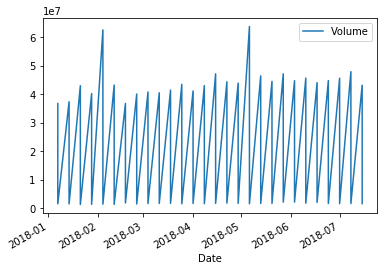

In [5]:
avo_data.plot(kind='line', x='Date', y='Volume')

Note that both Organic and Conventional are showing on a single line.  Let's fix this.

In [6]:
avo2 = avo_data.pivot(index='Date', columns='Type', values='Volume')
avo2.head()

Type,Conventional,Organic
Date,,
2018-01-07,36703156.72,1517332.70
2018-01-14,37299945.22,1476651.08
2018-01-21,42939821.55,1283987.65
2018-01-28,40171640.84,1336979.09
2018-02-04,62505646.52,1384683.41


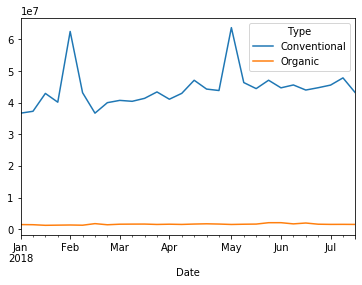

In [7]:
# next, let's plot them together
avo2.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000151CC71A208>,
      dtype=object)

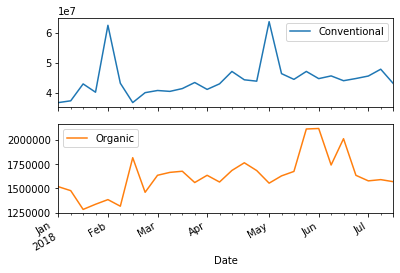

In [8]:
# to see more detail, let's view them seprately
# note that the x-axis remains aligned by the y-axis scale changes to better show variation
avo2.plot(subplots=True)

In [9]:
import seaborn as sns

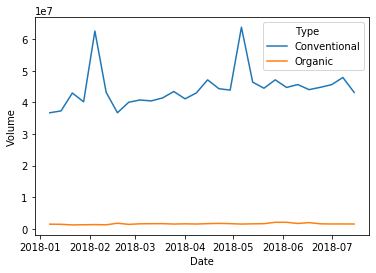

In [10]:
# using seaborn, we don't have to pivot the data (e.g., avo2)
sns.lineplot(x="Date", y="Volume", hue="Type", data=avo_data)

In [11]:
# now lets use seaborn to customize the theme and make this a bit sharper
# this gets us to the default seaborn theme
sns.set()

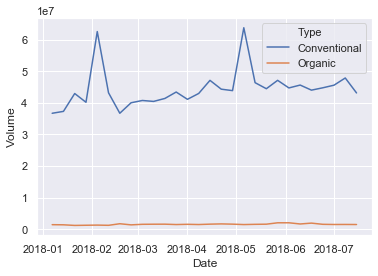

In [12]:
# note how this looks different
sns.lineplot(x="Date", y="Volume", hue="Type", data=avo_data)

Seaborn has "styles" that you can use to customize viz aesthetics.  <a href="https://seaborn.pydata.org/generated/seaborn.set_style.html">Here</a> is documentation.

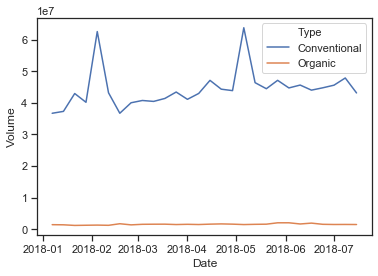

In [13]:
sns.set_style("ticks")
sns.lineplot(x="Date", y="Volume", hue="Type", data=avo_data)

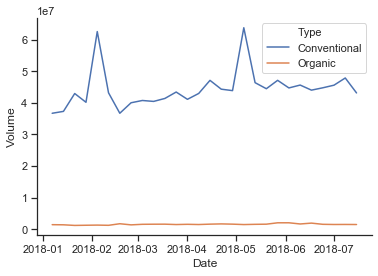

In [14]:
sns.lineplot(x="Date", y="Volume", hue="Type", data=avo_data)
# remove the box around the data (lowers data-ink ratio)
sns.despine()

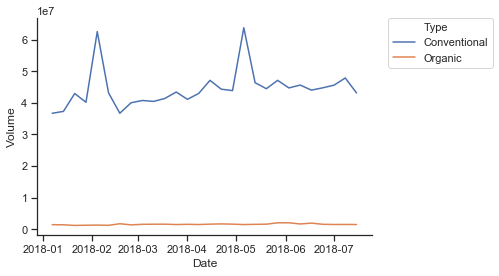

In [15]:
sns.lineplot(x="Date", y="Volume", hue="Type", data=avo_data)
sns.despine()
# move legend to outside of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

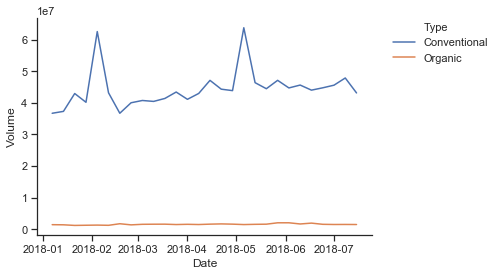

In [16]:
sns.lineplot(x="Date", y="Volume", hue="Type", data=avo_data)
sns.despine()
# let's get rid of the box around the frame
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, frameon=False)

<h3>Let's focus on organic avacados</h3>

In [17]:
# pivot data so we have two dataframes that are just focused on singular data types
# let's focus on Organic
Vol = avo_data.pivot(index='Date', columns='Type', values='Volume')
Pri = avo_data.pivot(index='Date', columns='Type', values='Price')

In [18]:
Vol = Vol.drop(['Conventional'], axis=1)
Vol.head()

Type,Organic
Date,
2018-01-07,1517332.70
2018-01-14,1476651.08
2018-01-21,1283987.65
2018-01-28,1336979.09
2018-02-04,1384683.41


In [19]:
Pri = Pri.drop(['Conventional'], axis=1)
Pri.head()

Type,Organic
Date,
2018-01-07,1.51
2018-01-14,1.59
2018-01-21,1.63
2018-01-28,1.61
2018-02-04,1.53


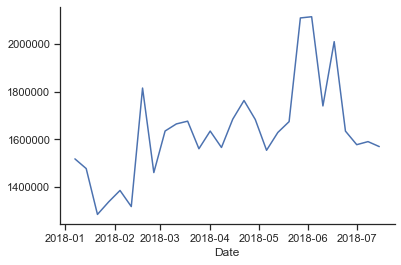

In [20]:
bottom = sns.lineplot(data=Vol)
bottom2 = bottom.get_legend().set_visible(False)
sns.despine()

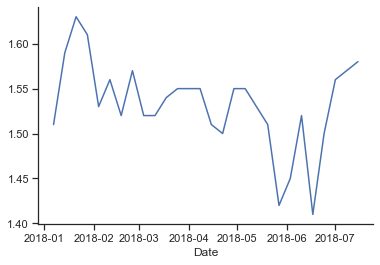

In [21]:
top = sns.lineplot(data=Pri)
top2 = top.get_legend().set_visible(False)
sns.despine()

<h3>Next steps</h3>
Can you make two plots and show price and volume together to see if there's a relationship?<br>
<a href="https://matplotlib.org/gallery/lines_bars_and_markers/multicolored_line.html#sphx-glr-gallery-lines-bars-and-markers-multicolored-line-py">Here</A> is documentation/code showing how that can be done.